<a href="https://colab.research.google.com/github/tjdux/Introduction-to-Machine-Learning-with-Python/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 예제에 사용할 데이터셋

### 1.1 분류

#### 1.1.1 forge 데이터셋

X.shape: (26, 2)


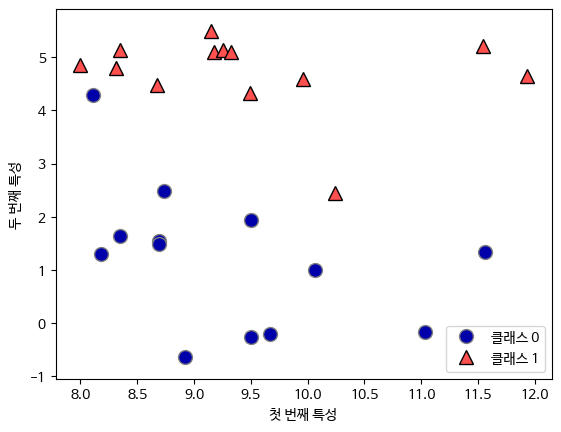

In [ ]:
X, y = mglearn.datasets.make_forge()

# 산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print(f"X.shape: {X.shape}")

plt.show()

#### 1.1.2 위스콘신 유방암 데이터셋

In [ ]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys():\n{cancer.keys()}")

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# 569개의 데이터 포인트, 30개의 특성
print(f"유방암 데이터의 형태:{cancer.data.shape}")

유방암 데이터의 형태:(569, 30)


In [ ]:
# 212개는 악성, 357개는 양성
print(
    "클래스별 샘플 갯수:\n",
    {str(n): int(v) for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
)

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [ ]:
# 각 특성의 의미
print(f"특성 이름\n: {cancer.feature_names}")

특성 이름
: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 1.2 회귀 알고리즘

#### 1.2.1 wave 데이터셋
- **특성이 적은 데이터셋 (저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋 (고차원 데이터셋)에서 그대로 유지되지 않을 수 있음**

Text(0, 0.5, '타깃')

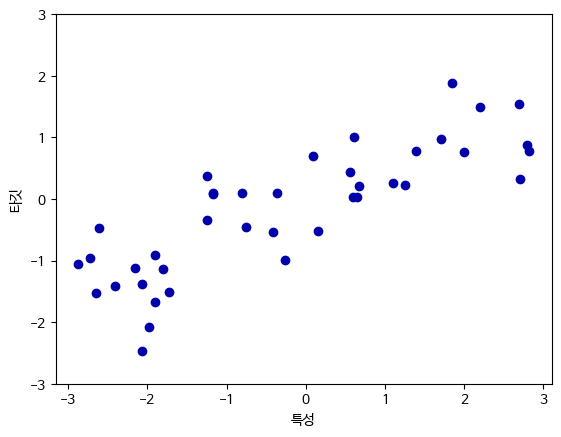

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### 1.2.2 보스턴 주택가격 데이터셋

In [ ]:
# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# 506개의 데이터 포인트, 특성 13개
print(f"데이터의 형태: {data.shape}")

데이터의 형태: (506, 13)


In [ ]:
# 특성 공학으로 유도된 데이터셋
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape: {X.shape}")

X.shape: (506, 104)


## 02 k-최근접 이웃
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음

### k-최근접 이웃 분류

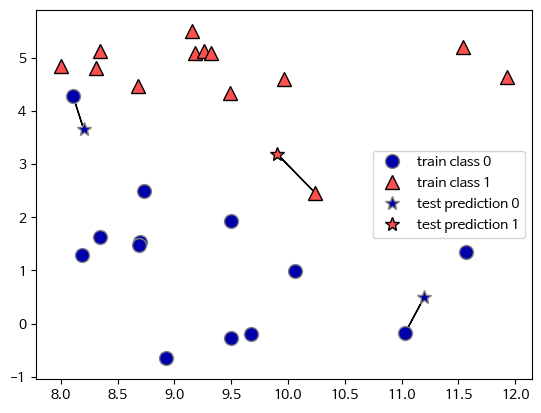

In [ ]:
# 1-최근접 이웃 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

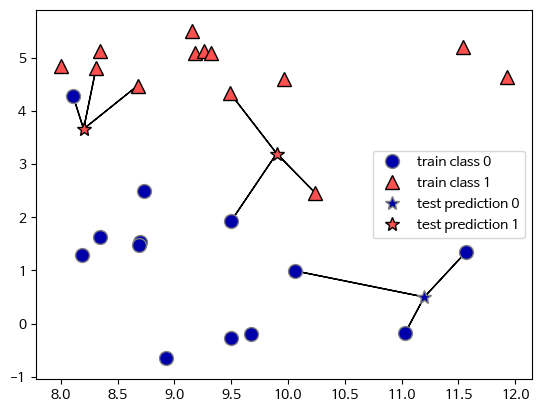

In [ ]:
# k-최근접 이웃 분류: k-최근접 이웃 중 다수의 클래스가 레이블
# 3-최근접 이웃
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### scikit-learn에서의 k-최근접 이웃 분류

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# KNeighborsClassifier 객체 만들기 (이웃 수 3)
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 학습 (예측할 때 이웃을 찾을 수 있도록 데이터를 저장)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 예측: 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾음
print(f"테스트 세트 예측: {clf.predict(X_test)}")

테스트 세트 예측: [1 0 1 0 1 0 0]


In [ ]:
# 정확도 평가
print(f"테스트 세트 정확도 : {round(clf.score(X_test, y_test), 2)}")

테스트 세트 정확도 : 0.86


### KNeighborsClassfier 분석

- 2차원 데이터셋 ➡️ 모든 테스트 포인트의 예측을 xy 평면에 그릴 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함
- ➡️ 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 **결정 경계** (decision boundary)를 볼 수 있음

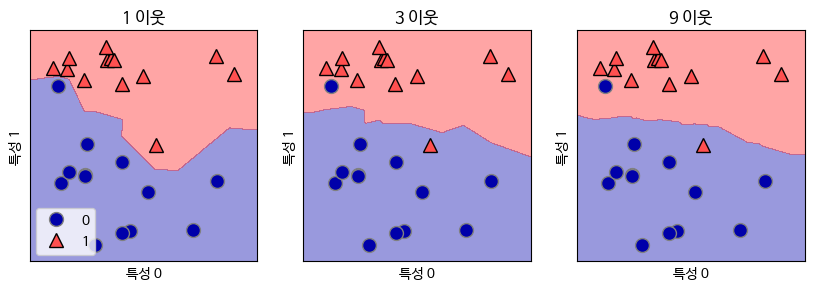

In [ ]:
# 결정 경계

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit(): self 오브젝트 리턴 ➡️ 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f"{n_neighbors} 이웃")
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)

- 이웃의 수를 늘릴수록 부드러운 결정 경계 ➡️ 단순한 모델
- 이웃⬇️ => 모델의 복잡도 ⬆️
- 이웃⬆️ => 모델의 복잡도 ⬇️
- 훈련 데이터 전체 개수를 이웃의 수로 지정하는 경우 => 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값

#### 복잡도와 일반화 사이의 관계

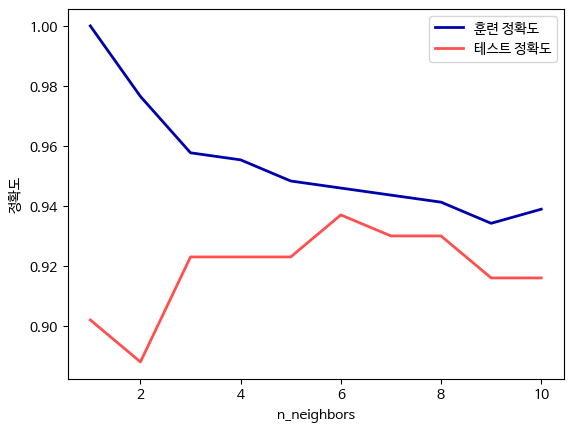

In [ ]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

# 훈련 세트 정확도, 일반화 정확도 배열
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors
neighbors_setting = range(1, 11)

for n_neighbors in neighbors_setting:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 그래프 그리기
plt.plot(neighbors_setting, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


- 훈련 정확도
  - 최근접 이웃의 수가 하나일 때: 훈련 데이터에 대한 예측이 완벽
  - 이웃의 수가 늘어나면서 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦
- 테스트 정확도
  - 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음 ➡️ 1-최근접 이웃이 모델을 너무 복잡하게 만듦
  - 10-최근접 이웃은 모델이 너무 단순하여 정확도는 낮아짐
  - 정확도가 가장 좋을 때는 중간 정도인 6-최근접 이웃

### k-최근접 이웃 회귀

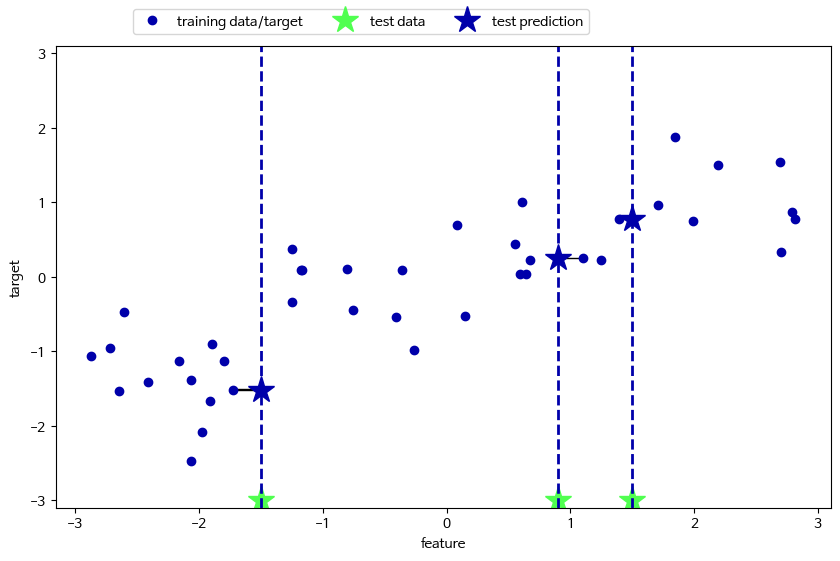

In [ ]:
# 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃 값
mglearn.plots.plot_knn_regression(n_neighbors=1)

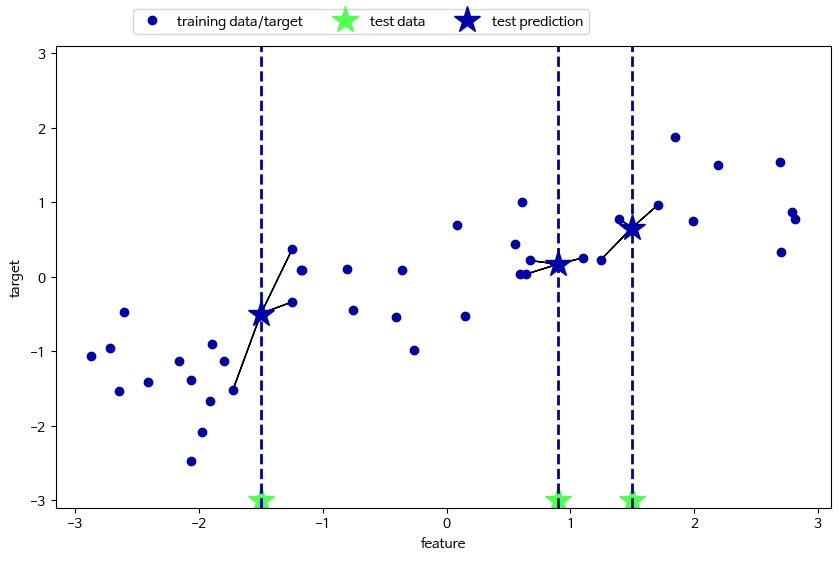

In [ ]:
# k-최근접 이웃 회귀: 이웃 간의 평균이 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### scikit-learn에서의 k-최근접 이웃 회귀

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 데이터 로드
X, y = mglearn.datasets.make_wave(n_samples=40)

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3-최근접 이웃 회귀 객체
reg = KNeighborsRegressor(n_neighbors=3)

# 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 예측
print(f"테스트 세트 예측:\n{reg.predict(X_test)}")

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


- `score()`: 회귀일 땐 $R^2$ (결정 계수) 값을 반환
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
  - 회귀 모델에서 예측의 적합도를 측정한 것
  - $ R^2 = 1 - \frac{모델의 오차}{평균만 썼을 때 오차}$
  - 모델이 아무것도 안 하고 그냥 모든 값을 평균으로 예측해도 설명되는 변동량 대비 모델이 얼마나 나은지를 측정
  - $y_i$: 실제 값
  - $\hat{y}_i$: 예측 값
  - $\bar{y}$: 실제 값의 평균
  - 0에서 1 사이의 값
    - 1: 예측이 완벽한 경우
    - 0: 훈련 세트의 출력값인 `y_train`의 평균으로만 예측하는 모델 ($\hat{y}_i = \bar{y}$)
  - 음수가 될 수 있음: 예측과 타깃이 상반된 경향을 가지는 경우


In [ ]:
print(f"테스트 세트 R^2: {round(reg.score(X_test, y_test), 2)}")

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석

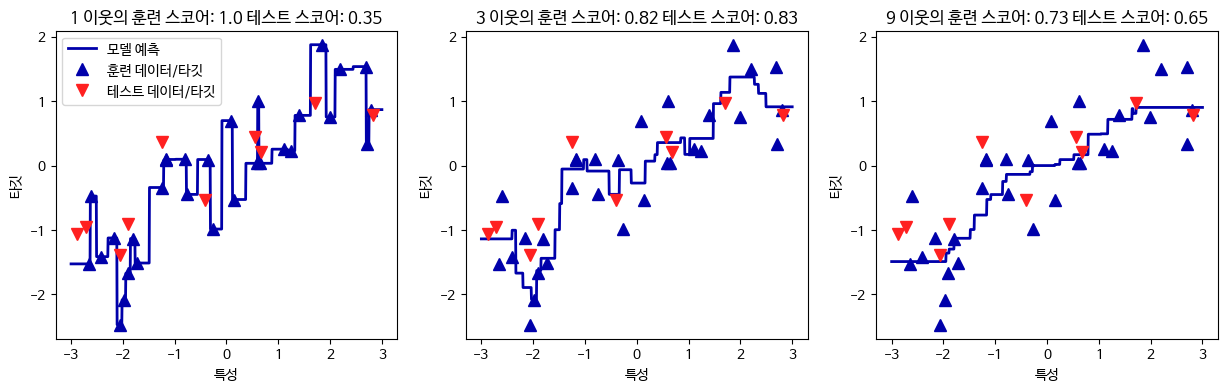

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3과 3 사이에 1,000 개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(f"{n_neighbors} 이웃의 훈련 스코어: {round(reg.score(X_train, y_train), 2)} 테스트 스코어: {round(reg.score(X_test, y_test), 2)}")
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

### 장단점과 매개변수
#### 중요한 매개변수
- **데이터 포인트 사이의 거리를 재는 방법**
  - 기본적으로 유클리디안 거리 방식 사용
- **이웃의 수**
#### 장단점
- 장점
  - 이해하기 매우 쉬운 모델
  - 매우 빠르게 만들 수 있음
  - 많이 조정하지 않아도 자주 좋은 성능을 발휘
  - 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점
- 단점
  - 훈련 세트가 매우 크면 예측이 느려짐
  - 데이터 전처리 과정이 중요
  - 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않음
  - 특성 값 대부분이 0인 (희소한) 데이터셋과는 잘 작동하지 않음 (대부분의 특성 값이 1이라 샘플들 간의 거리 차이가 미묘하거나 거의 동일해짐)
  - 예측이 느리고 많은 특성을 처리하는 능력이 부족하여 현업에서는 잘 쓰지 않음